# STOCK PRICE PREDICTION OF ICICI COMPANY(6 months data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
ic_6m=pd.read_csv('ic_6.csv')
ic_6m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,407.000000,409.850006,389.200012,390.899994,390.899994,1838244.0
1,2020-10-16,394.200012,401.299988,390.549988,395.950012,395.950012,574078.0
2,2020-10-19,400.100006,418.700012,400.100006,417.049988,417.049988,1261923.0
3,2020-10-20,413.950012,416.850006,410.799988,414.549988,414.549988,627993.0
4,2020-10-21,416.000000,428.250000,410.399994,420.350006,420.350006,1058131.0
...,...,...,...,...,...,...,...
118,2021-04-07,568.400024,580.000000,560.000000,577.549988,577.549988,1332613.0
119,2021-04-08,581.700012,585.750000,573.250000,576.750000,576.750000,3042430.0
120,2021-04-09,574.500000,579.150024,565.049988,566.450012,566.450012,834558.0
121,2021-04-12,548.650024,551.799988,531.250000,538.400024,538.400024,1419739.0


# EXPLORATORY ic_6m ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
ic_6m.shape

(123, 7)

In [4]:
#CHECKING NULL VALUES IN DATASET
ic_6m.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
ic_6m[ic_6m.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
ic_6m1=ic_6m.dropna()
ic_6m1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,407.000000,409.850006,389.200012,390.899994,390.899994,1838244.0
1,2020-10-16,394.200012,401.299988,390.549988,395.950012,395.950012,574078.0
2,2020-10-19,400.100006,418.700012,400.100006,417.049988,417.049988,1261923.0
3,2020-10-20,413.950012,416.850006,410.799988,414.549988,414.549988,627993.0
4,2020-10-21,416.000000,428.250000,410.399994,420.350006,420.350006,1058131.0
...,...,...,...,...,...,...,...
118,2021-04-07,568.400024,580.000000,560.000000,577.549988,577.549988,1332613.0
119,2021-04-08,581.700012,585.750000,573.250000,576.750000,576.750000,3042430.0
120,2021-04-09,574.500000,579.150024,565.049988,566.450012,566.450012,834558.0
121,2021-04-12,548.650024,551.799988,531.250000,538.400024,538.400024,1419739.0


In [7]:
ic_6m1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
ic_6m1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,537.020085,544.178691,528.232377,536.825411,536.825411,1.168860e+06
std,71.182572,71.998231,69.841426,70.822022,70.822022,6.996838e+05
min,391.600006,401.299988,388.100006,390.899994,390.899994,3.600280e+05
25%,485.125000,491.162499,476.612503,485.599999,485.599999,7.163090e+05
50%,538.074982,546.300018,531.000000,537.574982,537.574982,9.356885e+05
75%,595.237488,607.000015,581.875015,594.662521,594.662521,1.394349e+06
max,674.500000,679.299988,652.000000,674.000000,674.000000,4.022201e+06


In [9]:
#INFORMATION ABOUT DATASET
ic_6m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       122 non-null    object 
 1   Open       122 non-null    float64
 2   High       122 non-null    float64
 3   Low        122 non-null    float64
 4   Close      122 non-null    float64
 5   Adj Close  122 non-null    float64
 6   Volume     122 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.6+ KB


In [10]:
#GROUPING OF TWO SPECIFIC COLUMNS, DATE AND CLOSE
ic_6m2 = ic_6m1.groupby('Date')[['Close']].mean()


In [11]:
ic_6m2

,Close
Date,
2020-10-15,390.899994
2020-10-16,395.950012
2020-10-19,417.049988
2020-10-20,414.549988
2020-10-21,420.350006
...,...
2021-04-07,577.549988
2021-04-08,576.750000
2021-04-09,566.450012


In [12]:
type(ic_6m1.Date[0])

str

In [13]:
ic_6m1['Date'] = pd.to_datetime(ic_6m1['Date'], format='%Y-%m-%d')

In [14]:
type(ic_6m1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

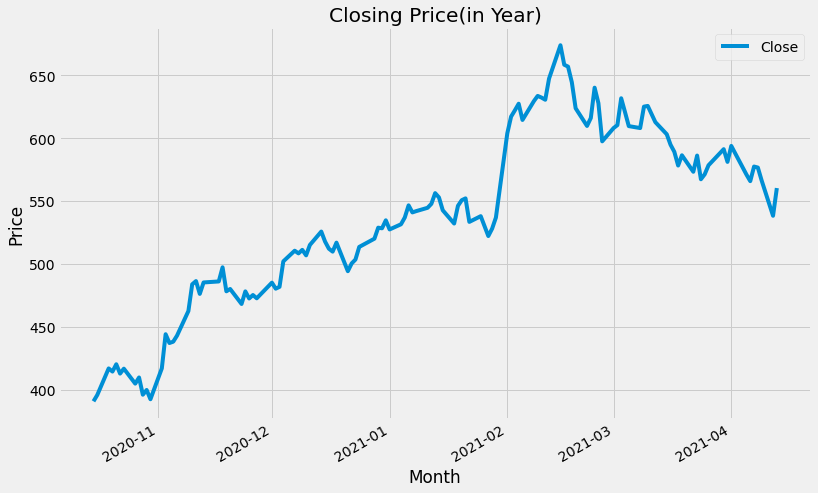

In [15]:
#plotting the graph with date againts closing price(in month)
ic_6m1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [16]:
ic_6m2

,Close
Date,
2020-10-15,390.899994
2020-10-16,395.950012
2020-10-19,417.049988
2020-10-20,414.549988
2020-10-21,420.350006
...,...
2021-04-07,577.549988
2021-04-08,576.750000
2021-04-09,566.450012


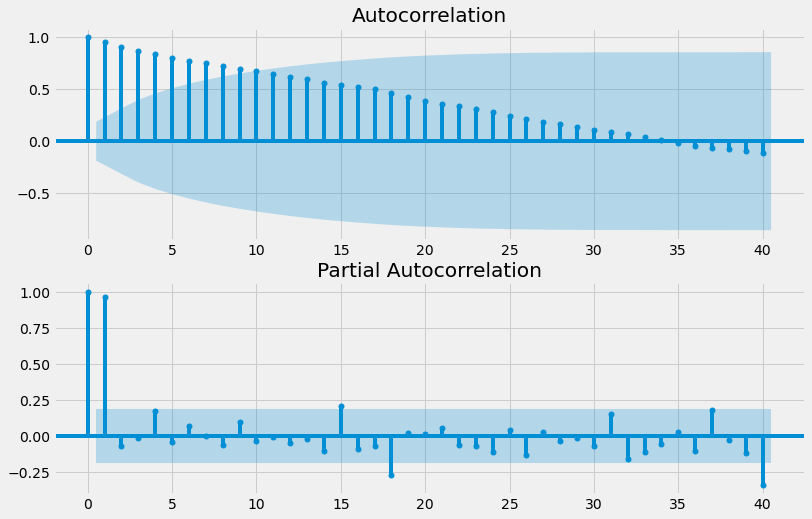

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ic_6m2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ic_6m2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [18]:
test_result=adfuller(ic_6m2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_6m has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adfuller_test(ic_6m2['Close'])

ADF Test Statistic : -1.772821863104194
p-value : 0.39403589785925924
#Lags Used : 4
Number of Observations Used : 117
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
ic_6m2['Close First Difference'] = ic_6m2['Close'] - ic_6m2['Close'].shift(1)
ic_6m2['Close'].shift(1)


Date
2020-10-15           NaN
2020-10-16    390.899994
2020-10-19    395.950012
2020-10-20    417.049988
2020-10-21    414.549988
                 ...    
2021-04-07    565.950012
2021-04-08    577.549988
2021-04-09    576.750000
2021-04-12    566.450012
2021-04-13    538.400024
Name: Close, Length: 122, dtype: float64

ADF Test Statistic : -5.45003572946504
p-value : 2.657022677986702e-06
#Lags Used : 3
Number of Observations Used : 117
strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_6m has no unit root and is stationary


Text(0.5, 1.0, 'ICICI 6 months')

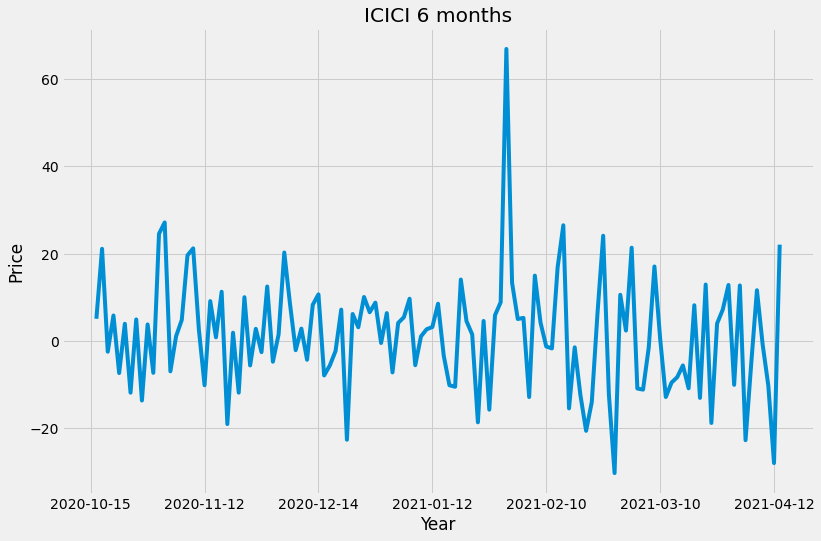

In [21]:
adfuller_test(ic_6m2['Close First Difference'].dropna())
ic_6m2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('ICICI 6 months')

AUTO ARIMA FUNCTION

In [22]:
stepwise_fit = auto_arima(ic_6m2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=971.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=973.654, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=973.654, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=971.023, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=975.654, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.668 seconds


ARIMA MODEL(TRAINING AND TESTING OF DATA)

In [23]:
train_ic_6m, test_ic_6m = ic_6m2[0:int(len(ic_6m2)*0.7)], ic_6m2[int(len(ic_6m2)*0.7):]
training_ic_6m = train_ic_6m['Close'].values
test_ic_6m = test_ic_6m['Close'].values
history = [x for x in training_ic_6m]
model_predictions = []
N_test_observations = len(test_ic_6m)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_ic_6m[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_ic_6m, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 218.2136907074512


FORECASTING

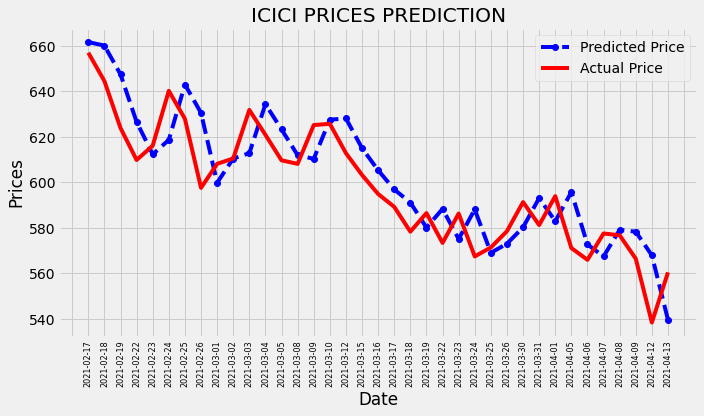

In [24]:
test_set_range = ic_6m2[int(len(ic_6m2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_ic_6m, color='red', label='Actual Price')
plt.title('ICICI PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), ic_6m2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

PREDICTION OF FUTURE PRICES

In [25]:
pred=model_fit.predict(start=len(ic_6m2),end=len(ic_6m2)+30,typ='levels')
print(pred)

[539.62919092 540.85835783 542.08752475 543.31669167 544.54585858
 545.7750255  547.00419242 548.23335933 549.46252625 550.69169317
 551.92086008 553.150027   554.37919392 555.60836083 556.83752775
 558.06669467 559.29586158 560.5250285  561.75419542 562.98336233
 564.21252925 565.44169617 566.67086308 567.90003    569.12919692
 570.35836383 571.58753075 572.81669767 574.04586458 575.2750315
 576.50419842 577.73336533]


In [26]:
# model performance
mse = mean_squared_error(test_ic_6m, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_ic_6m,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_ic_6m, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((model_predictions - test_ic_6m))/np.abs(test_ic_6m))
print('MAPE: '+str(mape))

MSE: 218.2136907074512
MAE: 12.644817499376591
RMSE: 14.772057768213987
MAPE: 0.052027307332289656
